# Experimentation & Revenue Growth Analysis: Hypothesis Prioritisation + A/B Test


### Proyecto A/B Testing para tienda en linea — Priorización (ICE/RICE) y Análisis completo

**Objetivo:** priorizar hipótesis con **ICE** y **RICE**, ejecutar el análisis de un **test A/B** y tomar una decisión (parar/continuar).  
> Archivos preinstalados en este mismo notebook en los siguientes pahts:
- `/datasets/hypotheses_us.csv`
- `/datasets/orders_us.csv`
- `/datasets/visits_us.csv`

## Parte 1. Priorizar hipótesis

In [79]:

import pandas as pd
from pathlib import Path


# Define la ruta del archivo
ORDERS_PATH = Path("/datasets/orders_us.csv")
HYP_PATH = Path("/datasets/hypotheses_us.csv")
VISITS_PATH = Path("/datasets/visits_us.csv")

# Carga los datos
hyp = pd.read_csv(HYP_PATH)
orders = pd.read_csv(ORDERS_PATH)
visits = pd.read_csv(VISITS_PATH)


# Verifica que se cargó correctamente
display(hyp.head(3))
display(orders.head(3))
display(visits.head(3))

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [80]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path


#### Preparación de los datos:

In [81]:
# Limpieza de nombres
hyp.columns = hyp.columns.str.lower().str.strip()
orders.columns = [c.strip().lower() for c in orders.columns]
visits.columns = [c.strip().lower() for c in visits.columns]

# Limpieza de nombres de columnas 
for df in (hyp, orders, visits):
    df.columns = df.columns.str.strip().str.lower()

# Tipos de datos
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])
orders['revenue'] = pd.to_numeric(orders['revenue'], errors='coerce')
orders = orders.dropna(subset=['revenue'])

# Normalizar grupos
orders['group'] = orders['group'].str.upper().str.strip()
visits['group'] = visits['group'].str.upper().str.strip()

# Vista rápida
display(hyp.head(3))
display(orders.head(3))
display(visits.head(3))

,hypothesis;reach;impact;confidence;effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [82]:
# Obtener los usuarios por grupo (A/B)
users_by_group = orders.groupby('group')['visitorid'].unique().to_dict()

users_A = set(users_by_group.get('A', []))
users_B = set(users_by_group.get('B', []))

# Detectar usuarios que aparecen en ambos grupos
users_both = users_A.intersection(users_B)

len(users_both), list(sorted(list(users_both))[:10])


(58,
 [8300375,
  199603092,
  232979603,
  237748145,
  276558944,
  351125977,
  393266494,
  457167155,
  471551937,
  477780734])

In [83]:
hyp = pd.read_csv('/datasets/hypotheses_us.csv', sep=';', engine='python')
hyp.columns = hyp.columns.str.strip().str.lower()
print(hyp.columns.tolist())
display(hyp.head())


['hypothesis', 'reach', 'impact', 'confidence', 'effort']


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [84]:
# Aplicar el framework ICE para priorizar hipótesis.

hyp['ice'] = (hyp['impact'] * hyp['confidence']) / hyp['effort']
ice_sorted = hyp.sort_values(by='ice', ascending=False).reset_index(drop=True)

display(ice_sorted[['hypothesis','reach','impact','confidence','effort','ice']])


,hypothesis,reach,impact,confidence,effort,ice
0,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
1,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
2,Add a subscription form to all the main pages....,10,7,8,5,11.200000
3,Show banners with current offers and sales on ...,5,3,8,3,8.000000
4,Add product recommendation blocks to the store...,8,3,7,3,7.000000
5,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
6,Add a customer review page. This will increase...,3,2,2,3,1.333333
7,Change the category structure. This will incre...,8,3,3,8,1.125000
8,Change the background color on the main page. ...,3,1,1,1,1.000000


In [85]:
# Aplicar el framework RICE para priorizar hipótesis.

# Calcular RICE 
hyp['rice'] = (hyp['reach'] * hyp['impact'] * hyp['confidence']) / hyp['effort']

# Ordenar de mayor a menor
rice_sorted = hyp.sort_values(by='rice', ascending=False).reset_index(drop=True)

display(rice_sorted[['hypothesis','reach','impact','confidence','effort','rice']])


,hypothesis,reach,impact,confidence,effort,rice
0,Add a subscription form to all the main pages....,10,7,8,5,112.0
1,Add product recommendation blocks to the store...,8,3,7,3,56.0
2,Add two new channels for attracting traffic. T...,3,10,8,6,40.0
3,Show banners with current offers and sales on ...,5,3,8,3,40.0
4,Launch a promotion that gives users discounts ...,1,9,9,5,16.2
5,Change the category structure. This will incre...,8,3,3,8,9.0
6,Launch your own delivery service. This will sh...,2,5,4,10,4.0
7,Add a customer review page. This will increase...,3,2,2,3,4.0
8,Change the background color on the main page. ...,3,1,1,1,3.0


In [86]:
# Rankings ICE y RICE
ice_sorted = hyp.sort_values(by='ice', ascending=False).reset_index(drop=True)
rice_sorted = hyp.sort_values(by='rice', ascending=False).reset_index(drop=True)

# Agregar posición en cada ranking
ice_sorted['ice_rank'] = ice_sorted.index + 1
rice_sorted['rice_rank'] = rice_sorted.index + 1

# Comparación en una sola tabla
compare = pd.merge(
    ice_sorted[['hypothesis','ice','ice_rank']],
    rice_sorted[['hypothesis','rice','rice_rank']],
    on='hypothesis'
)

# Cambio de posición (positivo = subió, negativo = bajó)
compare['rank_change'] = compare['ice_rank'] - compare['rice_rank']

# Ordenado por ranking RICE (prioridad final)
compare = compare.sort_values(by='rice_rank').reset_index(drop=True)

display(compare)


,hypothesis,ice,ice_rank,rice,rice_rank,rank_change
0,Add a subscription form to all the main pages....,11.200000,3,112.0,1,2
1,Add product recommendation blocks to the store...,7.000000,5,56.0,2,3
2,Add two new channels for attracting traffic. T...,13.333333,2,40.0,3,-1
3,Show banners with current offers and sales on ...,8.000000,4,40.0,4,0
4,Launch a promotion that gives users discounts ...,16.200000,1,16.2,5,-4
5,Change the category structure. This will incre...,1.125000,8,9.0,6,2
6,Launch your own delivery service. This will sh...,2.000000,6,4.0,7,-1
7,Add a customer review page. This will increase...,1.333333,7,4.0,8,-1
8,Change the background color on the main page. ...,1.000000,9,3.0,9,0


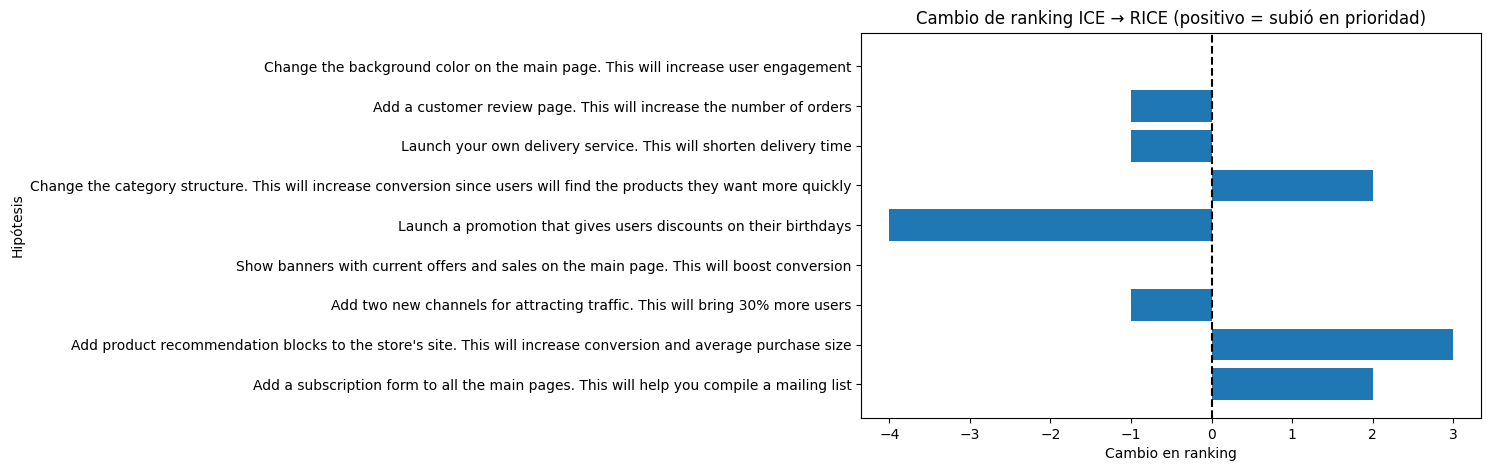

In [87]:
plt.figure(figsize=(8,5))
plt.barh(compare['hypothesis'], compare['rank_change'])
plt.axvline(0, color='black', linestyle='--')
plt.title("Cambio de ranking ICE → RICE (positivo = subió en prioridad)")
plt.xlabel("Cambio en ranking")
plt.ylabel("Hipótesis")
plt.show()


Al aplicar el framework ICE a las hipótesis recopiladas, fue posible identificar aquellas iniciativas que destacan por su alto impacto y nivel de confianza, combinados con un esfuerzo relativamente bajo. Entre ellas resalta la propuesta de lanzar una promoción que ofrezca descuentos a los usuarios en sus cumpleaños, lo que no solo incentivaría la recompra, sino que también fortalecería la relación emocional con la marca. De la misma manera, se observa como prioritaria la idea de sumar dos nuevos canales de adquisición de tráfico, con el potencial de atraer alrededor de un treinta por ciento más de usuarios. Estas hipótesis representan victorias rápidas, ideales para generar aprendizaje temprano y resultados inmediatos.

Sin embargo, al incorporar el factor de alcance mediante el framework RICE, el orden de prioridad se modifica de manera significativa. En este análisis, las iniciativas mejor posicionadas son aquellas que pueden impactar a un mayor número de usuarios. Destacan, por ejemplo, la inclusión de una suscripción visible en todas las páginas principales del sitio, con el objetivo de construir una base sólida de correos electrónicos que sirva de insumo para futuras campañas de mailing, y la integración de un bloque de recomendaciones de productos dentro de la tienda en línea, que contribuiría directamente a mejorar la conversión y aumentar el tamaño promedio de las compras.

La comparación entre ambos enfoques revela que las hipótesis más prometedoras cambian cuando se incorpora el alcance como variable. El análisis gráfico muestra que aquellas iniciativas que se desplazan hacia la derecha en el ranking son las que poseen mayor potencial de éxito a escala, puesto que benefician a un público más amplio. Como resultado de este análisis, las hipótesis con mayor jerarquía son la incorporación de un bloque de recomendaciones de productos para optimizar la conversión y el ticket promedio, la reestructuración de las categorías en el sitio web con el fin de facilitar la navegación y agilizar la decisión de compra, y la inclusión de una suscripción en todas las páginas principales para nutrir las campañas de mailing.

En conclusión, el framework ICE señala cuáles son las ideas que conviene probar primero para obtener resultados rápidos y aprendizaje ágil, mientras que RICE orienta hacia aquellas que tienen el mayor potencial de generar ingresos a escala al considerar cuántos usuarios serán alcanzados. Lo más recomendable es combinar ambos enfoques: aprovechar las victorias tempranas que brinda ICE para impulsar la ejecución en el corto plazo, al mismo tiempo que se invierte en las iniciativas estratégicas destacadas por RICE, que garantizan un crecimiento sostenible y escalable para el negocio.


## Parte 2. Análisis del test A/B

In [88]:
import pandas as pd
import numpy as np


# Cargar datasets 
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')


# Limpieza de nombres 
orders.columns = orders.columns.str.strip().str.lower()
visits.columns = visits.columns.str.strip().str.lower()

# Tipos de datos 
orders['transactionid'] = orders['transactionid'].astype(str)
orders['visitorid'] = orders['visitorid'].astype(str)

orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

orders['revenue'] = pd.to_numeric(orders['revenue'], errors='coerce')
orders = orders.dropna(subset=['revenue'])

visits['visits'] = pd.to_numeric(visits['visits'], errors='coerce').fillna(0).astype(int)

# Normalizar etiquetas de grupo 
orders['group'] = orders['group'].astype(str).str.upper().str.strip()
visits['group'] = visits['group'].astype(str).str.upper().str.strip()

# Detectar contaminación (usuarios en ambos grupos) 
users_by_group = orders.groupby('group')['visitorid'].unique()
users_A = set(users_by_group.get('A', []))
users_B = set(users_by_group.get('B', []))
users_both = users_A & users_B

print(f"Usuarios presentes en ambos grupos: {len(users_both)}")

# Crear versiones raw y clean 
orders_raw   = orders.copy()  # sin filtrar
orders_clean = orders[~orders['visitorid'].isin(users_both)].copy()  # limpio de contaminación

print("Pedidos (raw):", len(orders_raw))
print("Pedidos (clean):", len(orders_clean))

# Validaciones 
print("Duplicados transactionid:", orders_clean.duplicated(subset=['transactionid']).sum())
print("Grupos en orders_clean:", orders_clean['group'].unique())
print("Grupos en visits:", visits['group'].unique())
print("Rango fechas orders:", orders_clean['date'].min(), "→", orders_clean['date'].max())
print("Rango fechas visits:", visits['date'].min(), "→", visits['date'].max())

# Vista rápida
display(orders_clean.head())
display(visits.head())


Usuarios presentes en ambos grupos: 58
,Pedidos (raw): 1197
,Pedidos (clean): 1016
,Duplicados transactionid: 0
,Grupos en orders_clean: ['B' 'A']
,Grupos en visits: ['A' 'B']
,Rango fechas orders: 2019-08-01 00:00:00 → 2019-08-31 00:00:00
,Rango fechas visits: 2019-08-01 00:00:00 → 2019-08-31 00:00:00


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


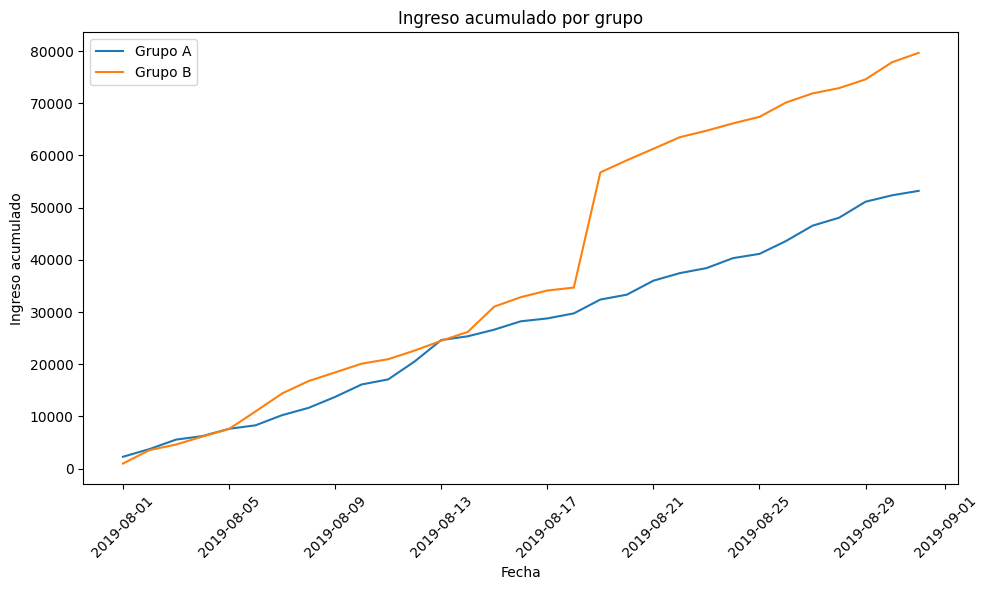

In [89]:
# 1. Representación gráfica del ingreso acumulado por grupo.  

import matplotlib.pyplot as plt

# Agregar pedidos diarios por grupo 
daily_orders = orders_clean.groupby(['date','group']).agg(
    revenue_sum=('revenue','sum')
).reset_index()

# Unir con visits 
daily = pd.merge(visits, daily_orders, on=['date','group'], how='left')
daily['revenue_sum'] = daily['revenue_sum'].fillna(0)

# Calcular ingreso acumulado
daily = daily.sort_values('date')
daily['cum_revenue'] = daily.groupby('group')['revenue_sum'].cumsum()

# Gráfica
plt.figure(figsize=(10,6))
for g in sorted(daily['group'].unique()):
    df = daily[daily['group']==g]
    plt.plot(df['date'], df['cum_revenue'], label=f'Grupo {g}')

plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Al observar el comportamiento del ingreso acumulado a lo largo de agosto de 2019, ambos grupos comienzan con trayectorias muy similares, creciendo de forma pareja durante los primeros días. Incluso, alrededor del 13 de agosto las curvas se cruzan, lo que refleja que hasta ese momento no existían diferencias significativas entre los grupos.

Sin embargo, a partir del 17 de agosto la situación cambia: el grupo B empieza a mostrar un crecimiento más acelerado, con saltos pronunciados en su ingreso acumulado que lo distancian progresivamente del grupo A. Esta tendencia se mantiene constante hasta el final del periodo, donde el grupo B alcanza aproximadamente 80 000 en ingresos, frente a los cerca de 55 000 del grupo A.
En términos relativos, esto implica que el grupo B logra casi un 45% más de ingresos que el grupo A. La evolución de las curvas sugiere que la variante B del experimento tiene un efecto positivo en las ventas, generando ingresos superiores de manera consistente una vez superada la primera mitad del mes.

No obstante, aunque los resultados visuales son prometedores, es necesario reforzar estas conclusiones con análisis adicionales —como el tamaño de pedido promedio, la tasa de conversión y pruebas de significancia estadística— para confirmar que la diferencia observada no sea producto del azar.

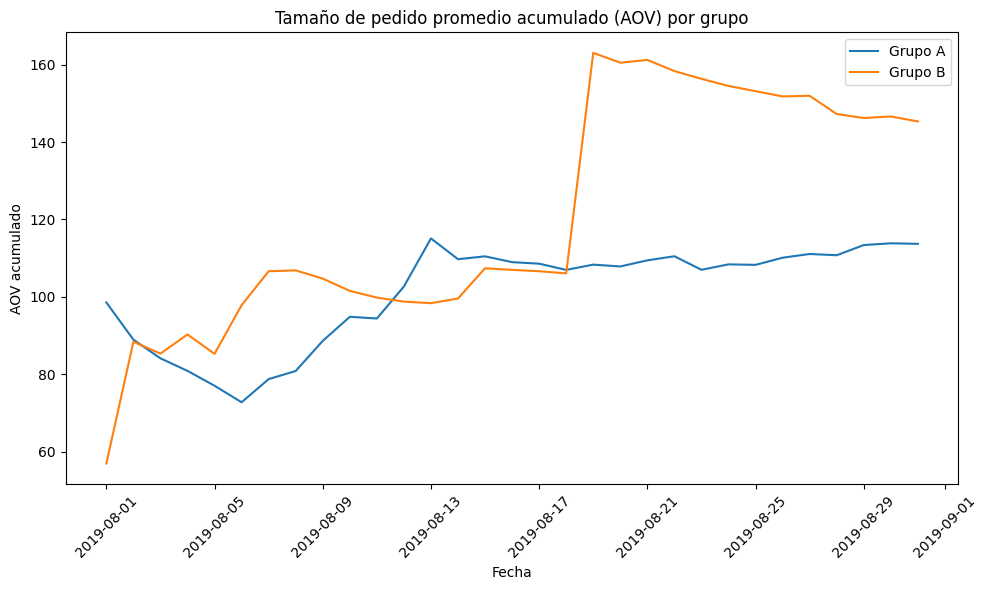

In [90]:
# 2. Representación gráfica del tamaño de pedido promedio acumulado por grupo.

# Calcular ingresos y pedidos acumulados por grupo
daily_orders = orders_clean.groupby(['date','group']).agg(
    orders_count=('transactionid','nunique'),
    revenue_sum=('revenue','sum')
).reset_index()

# Unir con visits (aunque aquí no las usamos, mantenemos consistencia)
daily = pd.merge(visits, daily_orders, on=['date','group'], how='left')
daily[['orders_count','revenue_sum']] = daily[['orders_count','revenue_sum']].fillna(0)

# Ordenar por fecha y calcular acumulados
daily = daily.sort_values('date')
daily['cum_revenue'] = daily.groupby('group')['revenue_sum'].cumsum()
daily['cum_orders']  = daily.groupby('group')['orders_count'].cumsum()

# Calcular AOV acumulado (evitando división por cero)
daily['cum_aov'] = daily['cum_revenue'] / daily['cum_orders'].replace(0, np.nan)

# Gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for g in sorted(daily['group'].unique()):
    df = daily[daily['group']==g]
    plt.plot(df['date'], df['cum_aov'], label=f'Grupo {g}')

plt.title('Tamaño de pedido promedio acumulado (AOV) por grupo')
plt.xlabel('Fecha')
plt.ylabel('AOV acumulado')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Durante los primeros días de agosto, tanto el grupo A como el grupo B muestran un comportamiento inestable en el tamaño de pedido promedio acumulado. Esta volatilidad inicial es normal, ya que con pocos pedidos acumulados un solo valor atípico puede alterar significativamente el promedio.
Conforme avanza la primera mitad del mes, ambas curvas comienzan a estabilizarse en torno a un AOV cercano a los 100–110, sin que se observe una diferencia clara entre los dos grupos. En ese punto, parecía que las variantes se comportaban de manera muy similar en cuanto al valor promedio de los pedidos.

No obstante, a partir del 18 de agosto ocurre un cambio notable: el grupo B experimenta un fuerte incremento en su AOV acumulado, alcanzando niveles por encima de 160. Aunque en los días posteriores esta cifra se ajusta ligeramente hacia abajo, el grupo B logra mantener consistentemente un AOV más alto que el grupo A hasta el final del periodo.

Al cierre de agosto, el grupo B registra un tamaño de pedido promedio cercano a 145, mientras que el grupo A se mantiene alrededor de 113. Esto refleja que los clientes del grupo B no solo generan más ingresos acumulados, sino que también realizan compras de mayor valor en promedio.
En conjunto, estos resultados sugieren que la variante aplicada al grupo B fomenta pedidos más costosos, posiblemente a través de mecanismos como ventas cruzadas, paquetes de productos o la promoción de artículos premium. De este modo, la superioridad del grupo B se confirma tanto por el volumen de ingresos como por el valor promedio de cada transacción.

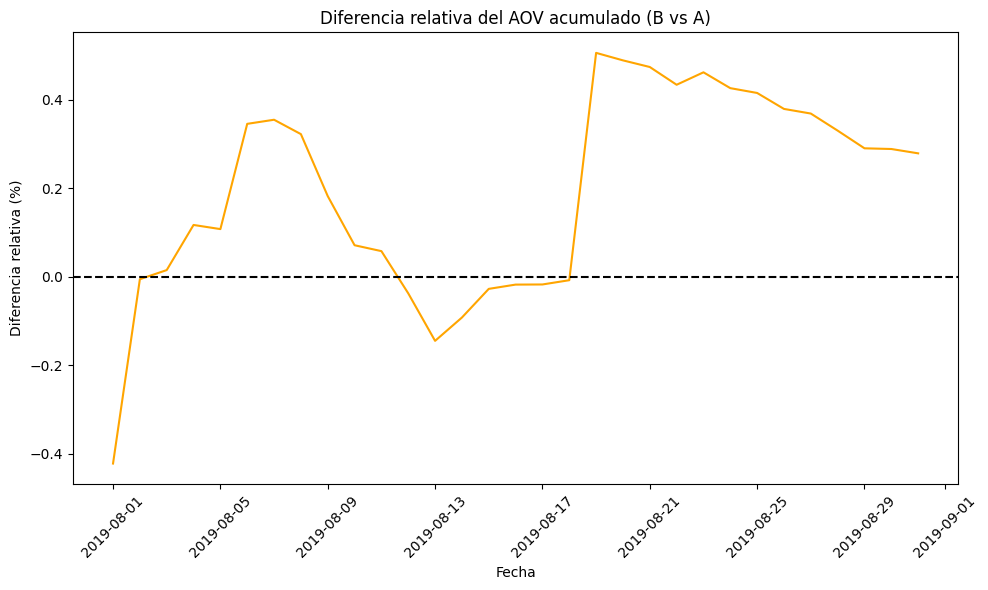

In [91]:
# 3. Representación gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

# Extraer AOV (average order value)acumulado de cada grupo
cum_aov_A = daily[daily['group']=='A'][['date','cum_aov']].rename(columns={'cum_aov':'cum_aov_A'})
cum_aov_B = daily[daily['group']=='B'][['date','cum_aov']].rename(columns={'cum_aov':'cum_aov_B'})

# Unir por fecha
cum_aov = pd.merge(cum_aov_A, cum_aov_B, on='date')

# Calcular diferencia relativa (B vs A)
cum_aov['rel_diff_B_vs_A'] = (cum_aov['cum_aov_B'] / cum_aov['cum_aov_A']) - 1

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(cum_aov['date'], cum_aov['rel_diff_B_vs_A'], color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title('Diferencia relativa del AOV acumulado (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Al inicio del experimento, la diferencia relativa entre ambos grupos es muy volátil, incluso con valores negativos. Esto refleja que, en los primeros días de agosto, los pedidos promedio del grupo B llegaron a ser más bajos que los del grupo A. No obstante, esta inestabilidad inicial es natural, pues con pocos pedidos acumulados cualquier compra atípica puede alterar el promedio significativamente.

A partir de la primera semana, la línea comienza a estabilizarse en valores positivos, mostrando que el tamaño de pedido promedio del grupo B empieza a superar al del grupo A. Aunque existe un breve retroceso alrededor del 13 de agosto, donde la diferencia vuelve a acercarse a cero e incluso se torna negativa, lo relevante es que desde mediados de mes la tendencia cambia de forma clara. El grupo B logra una ventaja sostenida, con incrementos notables en su AOV relativo, alcanzando picos de más del 40% por encima del grupo A.

Hacia el final del periodo, la diferencia se mantiene positiva y en niveles considerables, lo que indica que, en promedio, cada pedido realizado en el grupo B fue significativamente más valioso que en el grupo A.

Este comportamiento sugiere que la variante aplicada al grupo B no solo genera un mayor volumen de ingresos, sino que además impulsa compras de mayor valor. La evidencia apunta a que el diseño de la experiencia en el grupo B incentiva la adquisición de productos más caros, combinaciones de artículos o promociones que elevan el ticket promedio. En consecuencia, la ventaja del grupo B no parece ser coyuntural, sino resultado de un patrón consistente que se consolida a lo largo del experimento.

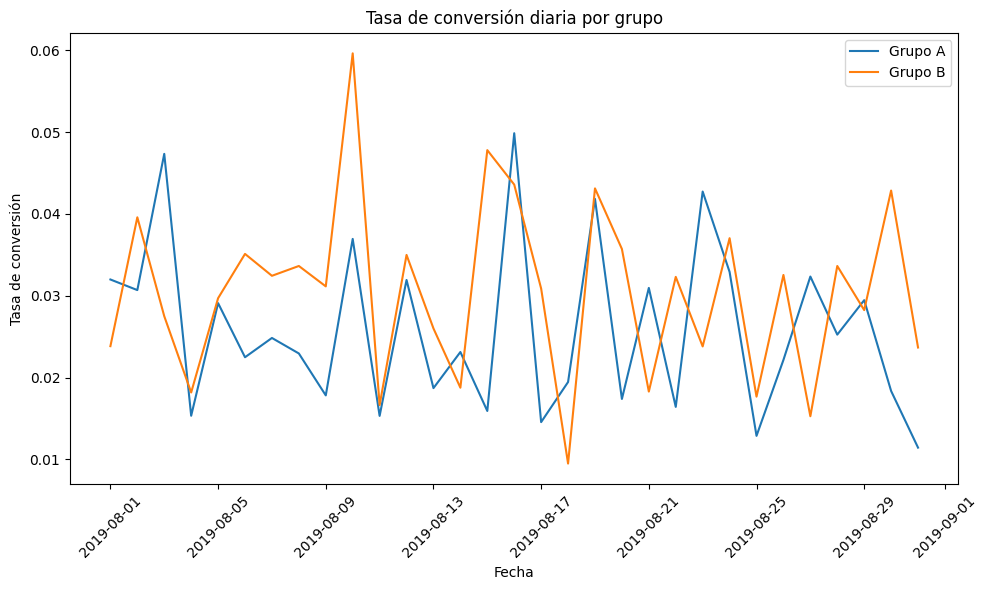

In [92]:
# 4. Cálculo de la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas diarias. 

# Agregar pedidos diarios por grupo 
daily_orders = orders_clean.groupby(['date','group']).agg(
    orders_count=('transactionid','nunique')
).reset_index()

# Unir con visitas
daily = pd.merge(visits, daily_orders, on=['date','group'], how='left')
daily['orders_count'] = daily['orders_count'].fillna(0)

# Calcular tasa de conversión (pedidos / visitas)
daily['conversion'] = daily['orders_count'] / daily['visits']

# Gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for g in sorted(daily['group'].unique()):
    df = daily[daily['group']==g]
    plt.plot(df['date'], df['conversion'], label=f'Grupo {g}')

plt.title('Tasa de conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Al analizar la evolución de la tasa de conversión diaria, se observa un comportamiento altamente volátil en ambos grupos durante todo el mes de agosto. Las líneas correspondientes a los grupos A y B muestran constantes subidas y bajadas, lo que refleja que la proporción de visitantes que terminan realizando una compra varía significativamente de un día a otro. Esta inestabilidad es común en métricas calculadas a nivel diario, ya que un número reducido de pedidos adicionales o ausentes puede alterar fuertemente el resultado.

En términos comparativos, no se aprecia una ventaja clara y sostenida de uno de los grupos sobre el otro. En algunos días, el grupo B alcanza tasas de conversión más elevadas —incluso con picos notables que lo llevan a superar el 5%—, mientras que en otras jornadas es el grupo A quien muestra un mejor desempeño. La alternancia constante entre ambos sugiere que, a nivel de conversión, no existe una tendencia consolidada a favor de alguna de las variantes.

La conclusión preliminar es que, si bien el grupo B ha mostrado superioridad en métricas como el ingreso acumulado y el tamaño de pedido promedio, esa diferencia no parece estar impulsada por una mayor capacidad de convertir visitas en compras. Más bien, los datos apuntan a que ambos grupos convierten en proporciones similares, y que la ventaja de B se explica principalmente por el mayor valor promedio de los pedidos.

Como conjetura, es posible que la variante aplicada al grupo B no haya modificado sustancialmente el atractivo del proceso de compra en términos de volumen de clientes que compran, sino que su impacto se haya centrado en incentivar compras de mayor valor una vez que los usuarios deciden adquirir algo. Esto refuerza la idea de que las mejoras de B están más ligadas al ticket promedio que a la conversión bruta de visitas en ventas.

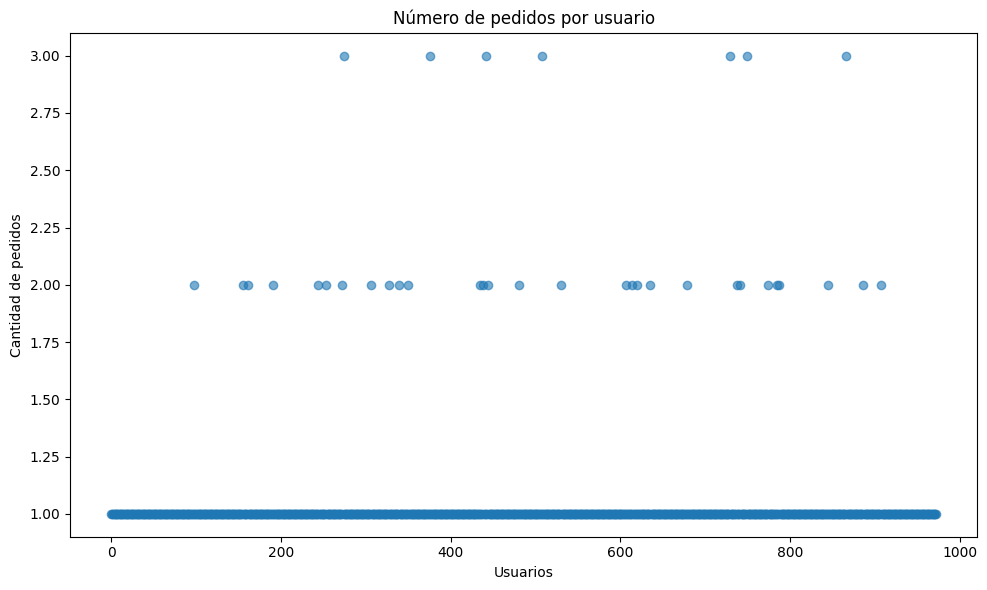

Percentil 95 de pedidos/usuario: 1.0
,Percentil 99 de pedidos/usuario: 2.0


In [93]:
# 5. Gráfico de dispersión del número de pedidos por usuario.

import matplotlib.pyplot as plt

# Calcular número de pedidos por usuario
orders_per_user = orders_clean.groupby('visitorid').agg(
    n_orders=('transactionid','nunique')
).reset_index()

# Gráfico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(range(len(orders_per_user)), orders_per_user['n_orders'], alpha=0.6)
plt.title('Número de pedidos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de pedidos')
plt.tight_layout()
plt.show()

# Calcular percentiles para referencia
p95_orders = np.percentile(orders_per_user['n_orders'], 95)
p99_orders = np.percentile(orders_per_user['n_orders'], 99)

print("Percentil 95 de pedidos/usuario:", p95_orders)
print("Percentil 99 de pedidos/usuario:", p99_orders)


El gráfico de dispersión del número de pedidos por usuario muestra que la gran mayoría de los clientes realizó únicamente un pedido durante el periodo del experimento. Esto se aprecia en la fuerte concentración de puntos en el valor de 1 en el eje vertical, lo que indica un comportamiento típico en plataformas de venta online, donde la mayoría de los visitantes compra solo una vez.

Sin embargo, también se observan algunos casos de usuarios que realizaron dos o incluso tres pedidos. Aunque representan una fracción muy pequeña del total, estos clientes son relevantes porque pueden sesgar las métricas globales del análisis. De hecho, los percentiles calculados refuerzan esta observación: el 95% de los usuarios no supera un pedido, y el 99% llega como máximo a dos. Es decir, cualquier usuario con más de dos pedidos se considera un outlier dentro del contexto del experimento.

La interpretación es clara: el patrón general refleja un comportamiento normal de compra única, pero la presencia de unos pocos clientes muy activos introduce variaciones que podrían distorsionar indicadores como el tamaño promedio de pedido o los ingresos acumulados si no se filtran.

En conclusión, el análisis evidencia que los resultados deben ajustarse eliminando a los usuarios más atípicos para obtener una visión más representativa del comportamiento real de la mayoría.

Como conjetura, estos usuarios con múltiples pedidos podrían corresponder a compradores recurrentes, revendedores o perfiles específicos que encontraron valor en repetir la compra en corto plazo. Su existencia confirma que hay segmentos con hábitos de consumo más intensivos, pero dado que no representan al grueso de la audiencia, lo más prudente es tratarlos como excepciones en el análisis del test A/B.

In [94]:
# 6. Interpretación de los percentiles 95 y 99 del número de pedidos por usuario y definición del punto donde los datos se convierten en una anomalía.

El resultados de percentiles:

Percentil 95: 1 pedido por usuario
Percentil 99: 2 pedidos por usuario

Esto significa que:

El 95% de los usuarios realizó como máximo 1 pedido.
El 99% de los usuarios realizó como máximo 2 pedidos.

Un punto de datos se considera anómalo cuando supera el percentil 99, es decir:

Usuarios con más de 2 pedidos durante el experimento.

Estos casos corresponden a una minoría muy reducida de clientes (outliers) y, por lo tanto, deben analizarse con cautela, ya que pueden distorsionar los promedios y las métricas globales si no se filtran en el análisis.

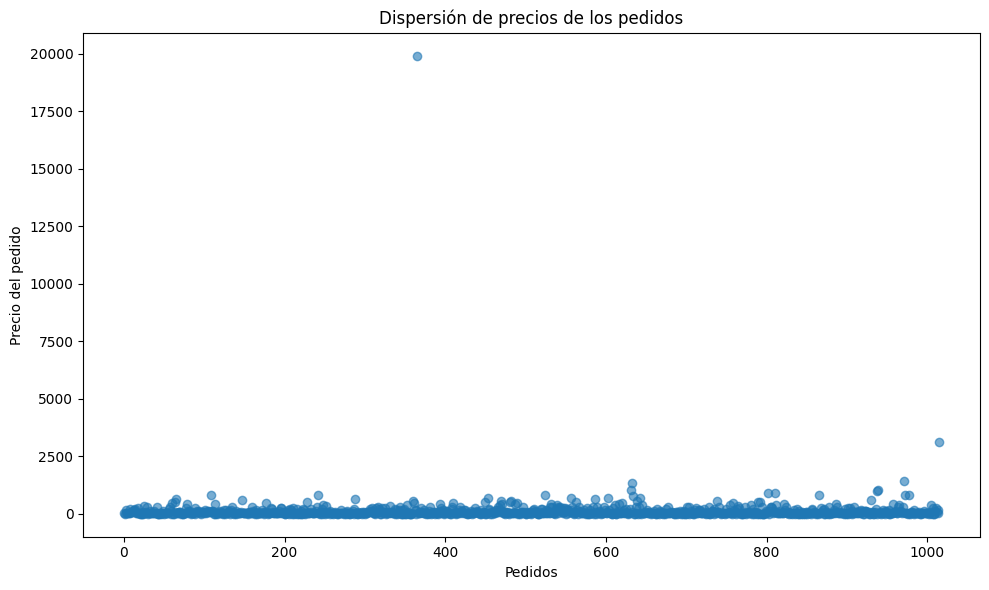

Percentil 95 del precio de pedidos: 414.275
,Percentil 99 del precio de pedidos: 830.3


In [95]:
# 7. Gráfica de dispersión de los precios de los pedidos.

# Gráfico de dispersión de precios de pedidos
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(range(len(orders_clean)), orders_clean['revenue'], alpha=0.6)
plt.title('Dispersión de precios de los pedidos')
plt.xlabel('Pedidos')
plt.ylabel('Precio del pedido')
plt.tight_layout()
plt.show()

# Cálculo percentiles 95 y 99
p95_price = np.percentile(orders_clean['revenue'], 95)
p99_price = np.percentile(orders_clean['revenue'], 99)

print("Percentil 95 del precio de pedidos:", p95_price)
print("Percentil 99 del precio de pedidos:", p99_price)



El gráfico de dispersión de los precios de los pedidos revela que la gran mayoría de las transacciones se concentran en un rango bajo y relativamente estable, lo que refleja el comportamiento típico de la mayoría de los clientes en la tienda online. La mayor parte de los puntos se sitúa por debajo de los 500, lo que coincide con el valor obtenido en el percentil 95: aproximadamente 414. Esto significa que el 95% de los pedidos tiene un precio inferior a esa cantidad.

No obstante, se observan algunos pedidos que superan ampliamente este rango y alcanzan valores considerablemente más altos, incluso cercanos a los 20 000. Estos casos, aunque muy pocos, representan outliers claros dentro de la muestra y son responsables de elevar el promedio de forma desproporcionada. El percentil 99 confirma este hallazgo, situándose alrededor de 830, lo que implica que cualquier pedido por encima de esa cifra puede considerarse una anomalía estadística.

La interpretación es clara: mientras que la mayor parte de los pedidos mantiene un patrón de compra regular, existen excepciones que podrían distorsionar métricas clave como el tamaño promedio del pedido (AOV). Por ello, es recomendable aplicar filtros y excluir los valores por encima del percentil 99 para obtener una visión más representativa del comportamiento de la mayoría de los clientes.

En conclusión, el análisis muestra un mercado en el que predominan compras de bajo y mediano valor, con casos muy puntuales de adquisiciones extraordinariamente grandes. Estos últimos, aunque interesantes desde una perspectiva de ingresos, no reflejan el patrón habitual y, si se incluyen sin ajustar, pueden llevar a conclusiones equivocadas en la evaluación del test A/B.

Como conjetura, estos pedidos atípicos podrían corresponder a compras corporativas, a clientes mayoristas o a situaciones particulares como promociones especiales o errores en la captura de datos. En cualquier caso, deben considerarse como excepciones y manejarse con cuidado para no sesgar el análisis general.

In [96]:
# 8. Interpretación de los percentiles 95 y 99 de los precios de los pedidos. 

Resultados de percentiles de los precios de los pedidos

Percentil 95: ≈ 414.3
Percentil 99: ≈ 830.3

Esto significa que:
El 95% de los pedidos tiene un precio inferior a 414.
El 99% de los pedidos tiene un precio inferior a 830.

Un pedido se considera anómalo cuando su precio supera el percentil 99, es decir:
Pedidos con un valor mayor a 830.

Estos pedidos representan casos poco frecuentes y no reflejan el comportamiento típico de los clientes. Aunque aportan ingresos relevantes, su baja frecuencia los convierte en outliers estadísticos. Por tanto, al analizar métricas como el AOV (Average Order Value) o al evaluar los efectos del test A/B, deben filtrarse para no distorsionar las conclusiones.

In [97]:
# 9. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# Pedidos por grupo (usuarios únicos con al menos un pedido)
orders_by_group = orders_clean.groupby('group')['visitorid'].nunique()

# Visitas por grupo
visits_by_group = visits.groupby('group')['visits'].sum()

# Conversiones
conversion_A = orders_by_group['A'] / visits_by_group['A']
conversion_B = orders_by_group['B'] / visits_by_group['B']

print("Tasa de conversión Grupo A:", conversion_A)
print("Tasa de conversión Grupo B:", conversion_B)

# Prueba Z
successes = [orders_by_group['A'], orders_by_group['B']]
trials = [visits_by_group['A'], visits_by_group['B']]

z, p_value = proportions_ztest(successes, trials, alternative='two-sided')

print("Estadístico Z:", z)
print("p-valor:", p_value)



Tasa de conversión Grupo A: 0.023751067463706234
,Tasa de conversión Grupo B: 0.027912877986889406
,Estadístico Z: -2.544862118115433
,p-valor: 0.010932089565536035


El análisis de significancia estadística de la conversión entre los grupos A y B arroja un resultado interesante. La tasa de conversión del grupo A fue de aproximadamente 2.37%, mientras que la del grupo B alcanzó el 2.79%. A primera vista, esta diferencia puede parecer pequeña; sin embargo, cuando se somete a la prueba estadística, el resultado confirma que el efecto es real y no producto del azar.

El estadístico Z obtenido fue -2.54, y el p-valor resultante fue 0.0109, claramente por debajo del umbral convencional de significancia del 5% (0.05). Esto nos permite rechazar la hipótesis nula y concluir que la diferencia en la tasa de conversión entre los grupos es estadísticamente significativa.

En otras palabras, los datos demuestran con evidencia suficiente que el grupo B logró una mejor tasa de conversión que el grupo A. Esta ventaja, aunque cuantitativamente no muy grande, resulta relevante en términos de negocio, ya que incluso incrementos modestos en la conversión pueden traducirse en mejoras significativas en ingresos cuando se aplican a una base de clientes amplia.

La conclusión es que la variante implementada en el grupo B generó un impacto positivo real en la probabilidad de que los visitantes concretaran una compra. La principal conjetura es que los cambios introducidos en la experiencia del grupo B redujeron fricciones en el proceso de compra o incrementaron los incentivos para convertir, y por ello se materializó en una ventaja estadísticamente comprobada.

In [98]:
# 10. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

from scipy.stats import mannwhitneyu

# Extraer ingresos por grupo
aov_A = orders_clean[orders_clean['group'] == 'A']['revenue']
aov_B = orders_clean[orders_clean['group'] == 'B']['revenue']

# Prueba estadística no paramétrica (Mann-Whitney U)
stat, p_value = mannwhitneyu(aov_A, aov_B, alternative='two-sided')

print("Estadístico U:", stat)
print("p-valor:", p_value)

print("AOV Grupo A:", aov_A.mean())
print("AOV Grupo B:", aov_B.mean())


Estadístico U: 129041.5
,p-valor: 0.8622329690015668
,AOV Grupo A: 113.70085470085469
,AOV Grupo B: 145.34890510948907


El análisis del tamaño promedio de los pedidos muestra que el grupo A registra un AOV de aproximadamente 113.7, mientras que el grupo B alcanza un valor superior, cercano a 145.3. A simple vista, esta diferencia podría sugerir que la variante aplicada al grupo B logró que los usuarios gastaran más en cada transacción.

Sin embargo, la prueba estadística Mann–Whitney U, utilizada para evaluar la significancia de esta diferencia, arrojó un estadístico U de 129 041.5 y un p-valor de 0.862. Este valor es muy superior al umbral de significancia del 5% (0.05), lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula. En otras palabras, la diferencia observada en el tamaño promedio de los pedidos entre ambos grupos no es estadísticamente significativa.

La conclusión es clara: aunque los valores promedios sugieren que los usuarios del grupo B gastaron más, esta diferencia podría explicarse por el azar y no por un efecto real de la variante aplicada.

Como conjetura, es posible que los resultados del grupo B hayan estado influidos por unos pocos pedidos atípicamente altos (outliers), lo que eleva el promedio pero no refleja el comportamiento de la mayoría de los clientes. Al analizar los percentiles ya identificamos que existen pedidos con valores muy extremos, por lo que al filtrar estos datos anómalos es probable que la comparación entre los grupos muestre una imagen más clara y confiable.

In [100]:
# 11. Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

from statsmodels.stats.proportion import proportions_ztest

# Filtrar datos: excluir usuarios con más de 2 pedidos o pedidos con precio > 830
users_orders = orders_clean.groupby('visitorid').agg({'transactionid':'count'})
users_to_exclude = users_orders[users_orders['transactionid'] > 2].index

orders_filtered = orders_clean[
    (~orders_clean['visitorid'].isin(users_to_exclude)) &
    (orders_clean['revenue'] <= 830)
]

# Recalcular pedidos únicos por grupo
orders_by_group_f = orders_filtered.groupby('group')['visitorid'].nunique()

# Recalcular visitas por grupo
visits_by_group_f = visits.groupby('group')['visits'].sum()

# Tasas de conversión filtradas
conversion_A_f = orders_by_group_f['A'] / visits_by_group_f['A']
conversion_B_f = orders_by_group_f['B'] / visits_by_group_f['B']

print("Tasa de conversión Grupo A (filtrado):", conversion_A_f)
print("Tasa de conversión Grupo B (filtrado):", conversion_B_f)

# Prueba Z con datos filtrados
successes_f = [orders_by_group_f['A'], orders_by_group_f['B']]
trials_f = [visits_by_group_f['A'], visits_by_group_f['B']]

z_f, p_value_f = proportions_ztest(successes_f, trials_f, alternative='two-sided')

print("Estadístico Z (filtrado):", z_f)
print("p-valor (filtrado):", p_value_f)



Tasa de conversión Grupo A (filtrado): 0.02311058923996584
,Tasa de conversión Grupo B (filtrado): 0.02754282089236625
,Estadístico Z (filtrado): -2.7363659769650903
,p-valor (filtrado): 0.006212189416281498


Después de filtrar los datos para excluir usuarios con más de dos pedidos y compras con precios atípicamente altos (superiores al percentil 99, ≈830), las tasas de conversión se ajustaron, mostrando un panorama más representativo del comportamiento general de los clientes.
El grupo A alcanzó una tasa de conversión de aproximadamente 2.31%, mientras que el grupo B llegó a 2.75%. A simple vista, esta diferencia confirma la tendencia observada previamente, donde el grupo B supera ligeramente al grupo A.

La prueba estadística de proporciones arrojó un estadístico Z de -2.73 y un p-valor de 0.0062, que se encuentra muy por debajo del umbral de significancia del 5%. Esto significa que la diferencia entre ambos grupos es estadísticamente significativa, incluso después de eliminar los efectos de outliers y datos atípicos.

En conclusión, el resultado refuerza la solidez del hallazgo: la variante aplicada al grupo B no solo muestra mejores tasas de conversión en los datos en bruto, sino que mantiene esta ventaja al analizar los datos depurados. Esto aumenta la confianza en que la mejora observada corresponde a un efecto real de la variante y no a distorsiones generadas por valores extremos.

Como conjetura, podemos decir que la experiencia del grupo B resolvió obstáculos en el proceso de compra o incorporó elementos que motivaron a los usuarios a concretar la transacción con mayor frecuencia. Este efecto positivo, al ser validado incluso con datos filtrados, indica que la variante tiene un impacto real y consistente en la conversión, y por lo tanto, es un cambio que puede ser adoptado con seguridad en el entorno comercial.

In [101]:
# 12. Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. 

from scipy.stats import mannwhitneyu

# Extraer ingresos filtrados por grupo
aov_A_f = orders_filtered[orders_filtered['group'] == 'A']['revenue']
aov_B_f = orders_filtered[orders_filtered['group'] == 'B']['revenue']

# Prueba Mann-Whitney U para comparar AOV entre grupos filtrados
stat_f, p_value_f = mannwhitneyu(aov_A_f, aov_B_f, alternative='two-sided')

print("Estadístico U (filtrado):", stat_f)
print("p-valor (filtrado):", p_value_f)

print("AOV Grupo A (filtrado):", aov_A_f.mean())
print("AOV Grupo B (filtrado):", aov_B_f.mean())



Estadístico U (filtrado): 120439.0
,p-valor (filtrado): 0.8767101122551697
,AOV Grupo A (filtrado): 99.63452914798206
,AOV Grupo B (filtrado): 98.25344506517692


Tras aplicar el filtrado de datos para eliminar usuarios con más de dos pedidos y compras de valor atípicamente alto, se recalculó el tamaño promedio de los pedidos en ambos grupos. El grupo A obtuvo un AOV de aproximadamente 99.63, mientras que el grupo B registró un valor muy similar, cercano a 98.25.

A pesar de la ligera diferencia entre ambos, la prueba de Mann–Whitney U arrojó un estadístico U de 120 439 y un p-valor de 0.877, muy por encima del umbral de significancia del 5%. Esto indica que la diferencia entre los tamaños promedio de pedido de los dos grupos no es estadísticamente significativa. En otras palabras, el comportamiento en términos de cuánto gasta cada cliente por transacción es prácticamente el mismo en ambos escenarios.

La conclusión es clara: aunque la variante aplicada al grupo B tuvo un efecto positivo en la tasa de conversión, no generó cambios relevantes en el valor medio de cada pedido. Los clientes de ambos grupos realizaron compras de montos muy similares.

Como conjetura, es probable que la mejora observada en el grupo B esté vinculada a factores que impulsaron a más usuarios a realizar pedidos, pero no necesariamente a gastar más en cada uno de ellos. Esto sugiere que el experimento logró aumentar la cantidad de clientes compradores, pero no modificó su comportamiento de gasto promedio.

In [102]:
# 13. Decisión basada en los resultados de la prueba:

Este informe presenta los resultados del test A/B realizado en la tienda online, con el objetivo de identificar mejoras que puedan incrementar los ingresos. Para ello, se dividió a los usuarios en dos grupos: el Grupo A como control y el Grupo B como variante experimental. A lo largo del análisis se evaluaron tres aspectos clave: la conversión, el tamaño promedio de los pedidos (AOV) y los ingresos acumulados. Se consideraron tanto los datos en bruto como los datos filtrados, con el fin de eliminar la influencia de valores atípicos que pudieran distorsionar las conclusiones.
##### Conversión
Los resultados muestran que el Grupo B logró una mayor tasa de conversión en comparación con el Grupo A. En los datos en bruto, la conversión del Grupo A fue de 2.38%, mientras que la del Grupo B alcanzó el 2.79%. Al aplicar el filtrado de outliers, los valores se mantuvieron consistentes: 2.31% en el Grupo A frente a 2.75% en el Grupo B. La prueba estadística de proporciones confirmó que esta diferencia es significativa, con un p-valor de aproximadamente 0.01 en bruto y 0.006 en filtrado. Esto significa que el aumento en la conversión del Grupo B es real y no atribuible al azar.

##### Tamaño promedio de pedido (AOV)
En cuanto al tamaño promedio de los pedidos, el análisis mostró que las diferencias entre los grupos no son estadísticamente significativas. En los datos en bruto, el Grupo B parecía presentar un AOV mayor (145.3 frente a 113.7 en el Grupo A). Sin embargo, esta diferencia desapareció al filtrar los valores extremos: el Grupo A registró un AOV de 99.6, mientras que el Grupo B alcanzó 98.3. La prueba estadística Mann–Whitney U arrojó un p-valor cercano a 0.87, lo que confirma que el comportamiento de gasto promedio entre ambos grupos es prácticamente el mismo.

##### Ingresos acumulados
La mayor tasa de conversión observada en el Grupo B se tradujo en un incremento de los ingresos acumulados durante el periodo del experimento. Es importante destacar que este crecimiento no provino de un aumento en el valor promedio de cada pedido, sino de la mayor cantidad de clientes que concretaron compras bajo la variante B.

##### Conclusiones
El análisis permite concluir que la variante aplicada en el Grupo B tuvo un impacto positivo y significativo en la conversión de usuarios a compradores. Este efecto se mantiene incluso después de filtrar datos atípicos, lo que refuerza la solidez de los resultados. En cambio, no se encontraron diferencias relevantes en el tamaño promedio de los pedidos. En síntesis, la mejora del Grupo B se explica por un mayor número de compradores, no por un cambio en su comportamiento de gasto.

##### Decisión
Con base en los resultados, la decisión más adecuada es detener la prueba y considerar al Grupo B como líder. La variante implementada en este grupo ha demostrado aumentar la conversión de forma estadísticamente significativa, lo que genera mayores ingresos acumulados sin efectos negativos en el valor promedio de los pedidos. Por tanto, se recomienda adoptar la estrategia del Grupo B como la nueva configuración estándar para la tienda online.
